<h1>Applied Machine Learning - Exercise 4</h1>


<h2> Classification Datasets</h2>

- **Bank Marketing Dataset**: [Bank Marketing Data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Occupancy Detection Dataset**: [Occupancy Detection Data](https://archive.ics.uci.edu/dataset/357/occupancy+detection)

<h2>Data Preprocessing Steps</h2>

1. **Convert Non-Numeric Values to Numeric**  
   Convert categorical data into numeric format. Consider using a dictionary or `pandas.get_dummies` for one-hot encoding.
   
2. **Handle Missing Values**  
   Remove rows with missing values if necessary.

3. **Data Splitting**  
   Divide data into training (80%) and testing (20%) sets.

<h3>Bank Marketing Dataset</h3>

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# import Bank Marketing Dataset
bank_marketing = fetch_ucirepo(id=222) 
X_bank_marketing = bank_marketing.data.features # pandas amount rows, columns (45211, 16)
y_bank_marketing = bank_marketing.data.targets 

In [3]:
missing_values = X_bank_marketing.isnull().sum()

X_bank_marketing.loc[:, 'job'] = X_bank_marketing['job'].fillna("missing")
X_bank_marketing.loc[:, 'education'] = X_bank_marketing['education'].fillna("missing")
X_bank_marketing.loc[:, 'contact'] = X_bank_marketing['contact'].fillna("missing")
X_bank_marketing.loc[:, 'poutcome'] = X_bank_marketing['poutcome'].fillna("missing")

In [4]:
# Numerical Columns -> Integer
numerical_columns = ["age", "balance", "duration", "campaign", "pdays", "previous"]
X_bank_marketing[numerical_columns] = X_bank_marketing[numerical_columns].apply(pd.to_numeric, errors='coerce', downcast='integer')

# Binary Columns (Yes/No) -> Boolean
binary_columns = ["default", "housing", "loan"]
for col in binary_columns:
    X_bank_marketing[col] = X_bank_marketing[col].str.strip().str.lower().map({'yes': True, 'no': False})
    X_bank_marketing[col] = X_bank_marketing[col].astype('boolean')

# Target variable y -> Boolean
y_bank_marketing["y"] = y_bank_marketing["y"].str.strip().str.lower().map({'yes': True, 'no': False})
y_bank_marketing["y"] = y_bank_marketing["y"].astype('boolean')

# Categorical Columns -> 'category' datatype
categorical_columns = ["job", "marital", "education", "contact", "poutcome", "month"]
X_bank_marketing[categorical_columns] = X_bank_marketing[categorical_columns].astype('category')

/var/folders/wf/36j9qfzs04x5_lyfc2d81f5h0000gn/T/ipykernel_26468/2245560605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_bank_marketing[numerical_columns] = X_bank_marketing[numerical_columns].apply(pd.to_numeric, errors='coerce', downcast='integer')
/var/folders/wf/36j9qfzs04x5_lyfc2d81f5h0000gn/T/ipykernel_26468/2245560605.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_bank_marketing[col] = X_bank_marketing[col].str.strip().str.lower().map({'yes': True, 'no': False})
/var/folders/wf/36j9qf

In [5]:
# Map für die Monate
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
X_bank_marketing['day'] = X_bank_marketing['day_of_week']
X_bank_marketing['month'] = X_bank_marketing['month'].map(month_map)
X_bank_marketing = X_bank_marketing.drop(columns=['day_of_week'])

# Work with a copy
X_bank_marketing = X_bank_marketing.copy()

# Step 1: Assign `year` based on the sequence of months
X_bank_marketing['year'] = None

# Initialize variables for tracking
current_year = 2008
previous_month = 5  # Starting from May 2008

# Iterate through the DataFrame and determine the year
for index, row in X_bank_marketing.iterrows():
    current_month = row['month']
    
    # If the month decreases, it's a new year
    if current_month < previous_month:
        current_year += 1
    
    # Assign the current year to the row
    X_bank_marketing.at[index, 'year'] = current_year
    
    # Update the previous month
    previous_month = current_month

# Step 2: Create a `date` column
X_bank_marketing['date'] = pd.to_datetime(X_bank_marketing[['year', 'month', 'day']])

# Step 3: Determine the day of the week
X_bank_marketing['day_of_week'] = X_bank_marketing['date'].dt.day_name()

In [6]:
X_bank_marketing = X_bank_marketing.drop(columns=['month', 'day', 'year', 'date', 'poutcome', 'day_of_week']) # TODO 

In [7]:
categorical_columns_X_bank_marketing = ["job", "marital", "education", "contact"] # TODO
print("Kategorische Spalten:", categorical_columns)

X_bank_marketing = pd.get_dummies(X_bank_marketing, columns=categorical_columns_X_bank_marketing, drop_first=True)
print('X_bank_marketing: amount rows, columns',X_bank_marketing.shape)

# Konvertiere alle booleschen Spalten in int8
for col in X_bank_marketing.select_dtypes(include='bool').columns:
    X_bank_marketing[col] = X_bank_marketing[col].astype('int8')

# Liste der kontinuierlichen Features
continuous_features_X_bank_marketing = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Binäre Features sind alle anderen Spalten außer den kontinuierlichen
binary_features = [col for col in X_bank_marketing.columns if col not in continuous_features_X_bank_marketing]

# Extrahiere die kontinuierlichen Features und konvertiere sie in float64
X_continuous = X_bank_marketing[continuous_features_X_bank_marketing].astype(np.float64)

# Berechne Mittelwert und Standardabweichung der kontinuierlichen Features
X_mean = np.mean(X_continuous, axis=0)
X_std = np.std(X_continuous, axis=0)

# Standardisiere die kontinuierlichen Features
X_continuous_standardized = (X_continuous - X_mean) / X_std
X_bank_marketing[continuous_features_X_bank_marketing] = X_continuous_standardized

Kategorische Spalten: ['job', 'marital', 'education', 'contact', 'poutcome', 'month']
X_bank_marketing: amount rows, columns (45211, 27)


In [8]:
Xtrain_bank_marketing, Xtest_bank_marketing, Ytrain_bank_marketing, Ytest_bank_marketing = train_test_split(X_bank_marketing, y_bank_marketing, test_size=0.2, random_state=42)

Xtrain_bank_marketing.insert(0, 'bias', 1)
Xtest_bank_marketing.insert(0, 'bias', 1)

<h3>Occupancy Detection Dataset</h3>

In [9]:
occupancy_detection = fetch_ucirepo(id=357) 
X_occupancy_detection = occupancy_detection.data.features # pandas
y_occupancy_detection = occupancy_detection.data.targets 

In [10]:
# Convert specific columns to numeric, coercing errors to NaN if needed
columns_to_convert_X_occupancy_detection = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

for column in columns_to_convert_X_occupancy_detection:
    X_occupancy_detection[column] = pd.to_numeric(X_occupancy_detection[column], errors='coerce')

/var/folders/wf/36j9qfzs04x5_lyfc2d81f5h0000gn/T/ipykernel_26468/1270267691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_occupancy_detection[column] = pd.to_numeric(X_occupancy_detection[column], errors='coerce')


In [11]:
# 'date' to 'day_of_week', otherwise too many columns after dummy variables creation + easier to interpret
X_occupancy_detection['date'] = pd.to_datetime(X_occupancy_detection['date'], errors='coerce')

# Proceed if confirmed as datetime
if pd.api.types.is_datetime64_any_dtype(X_occupancy_detection['date']):
    # Continue with transformations as previously described
    X_occupancy_detection['day_of_week'] = X_occupancy_detection['date'].dt.day_name().str.lower()
    
    def get_time_of_day(hour):
        if 5 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 17:
            return 'afternoon'
        elif 17 <= hour < 21:
            return 'evening'
        else:
            return 'night'

    X_occupancy_detection['time_of_day'] = X_occupancy_detection['date'].dt.hour.apply(get_time_of_day)

    # Create dummy variables
    X_occupancy_detection = pd.get_dummies(X_occupancy_detection, columns=['day_of_week', 'time_of_day'])

    # Drop 'date' column if no longer needed
    X_occupancy_detection = X_occupancy_detection.drop(columns=['date'])
else:
    print("Error: 'date' column is still not in datetime format.")

/var/folders/wf/36j9qfzs04x5_lyfc2d81f5h0000gn/T/ipykernel_26468/4239120140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_occupancy_detection['date'] = pd.to_datetime(X_occupancy_detection['date'], errors='coerce')
/var/folders/wf/36j9qfzs04x5_lyfc2d81f5h0000gn/T/ipykernel_26468/4239120140.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_occupancy_detection['day_of_week'] = X_occupancy_detection['date'].dt.day_name().str.lower()


In [12]:
# Drop rows with NaT in X_occupancy_detection and reset the index
X_occupancy_detection = X_occupancy_detection.dropna().reset_index(drop=True) # (20560, 17)

# Reset the index of y_occupancy_detection to match X_occupancy_detection after dropping rows
y_occupancy_detection = y_occupancy_detection.loc[X_occupancy_detection.index].reset_index(drop=True)

In [13]:
X_occupancy_detection = X_occupancy_detection.replace({True: 1, False: 0})

# Standardize the continuous features (z-score normalization)
X_occupancy_detection[columns_to_convert_X_occupancy_detection] = (
    X_occupancy_detection[columns_to_convert_X_occupancy_detection] - X_occupancy_detection[columns_to_convert_X_occupancy_detection].mean()
) / X_occupancy_detection[columns_to_convert_X_occupancy_detection].std()
X_occupancy_detection = X_occupancy_detection.astype(np.float64)
y_occupancy_detection = y_occupancy_detection.astype(np.float64)

Xtrain_occupancy_detection, Xtest_occupancy_detection, Ytrain_occupancy_detection, Ytest_occupancy_detection = train_test_split(X_occupancy_detection, y_occupancy_detection, test_size=0.2, random_state=42)

Xtrain_occupancy_detection.insert(0, 'bias', 1)
Xtest_occupancy_detection.insert(0, 'bias', 1)

In [14]:
# Replace NaN, positive infinity, and negative infinity in the features DataFrame
X_occupancy_detection = X_occupancy_detection.replace([np.inf, -np.inf], np.nan)
X_occupancy_detection = X_occupancy_detection.fillna(0.0)

# Replace NaN, positive infinity, and negative infinity in the target Series
y_occupancy_detection = y_occupancy_detection.replace([np.inf, -np.inf], np.nan)
y_occupancy_detection = y_occupancy_detection.fillna(0.0)

binary_columns = [col for col in X_occupancy_detection.columns if X_occupancy_detection[col].nunique() == 2]
X_occupancy_detection[binary_columns] = (X_occupancy_detection[binary_columns] - X_occupancy_detection[binary_columns].mean()) / X_occupancy_detection[binary_columns].std()

In [15]:
X_occupancy_detection = X_occupancy_detection.replace([np.inf, -np.inf], np.nan)
X_occupancy_detection = X_occupancy_detection.fillna(0)

<h2>Linear Classification with Gradient Descent</h2>

<h3>Exercise 1: Linear Classification with Stochastic Gradient Descent/Ascend</h3>

**Logistic (sigmoid) function:** $ \sigma(z) = \frac{1}{1 + e^{-\beta^T x_n}} $

In [16]:
def sigmoid(z):
    z = np.asarray(z, dtype=np.float64)
    z = np.clip(z, -709, 709)
    return 1 / (1 + np.exp(-z))

In [17]:
def predict(X, beta, threshold=0.5):
    # Calculate the linear combination of features and weights
    linear_combination = np.dot(X, beta)
    # Apply the sigmoid function to get probabilities
    probabilities = sigmoid(linear_combination)
    # Apply threshold to determine the class (0 or 1)
    return (probabilities >= threshold).astype(int)

### Log-Likelihood Formula

The log-likelihood function for logistic regression is given by:

$
\sum_{n=1}^N \left( y_n \langle x_n, \beta \rangle - \log \left( 1 + e^{\langle x_n, \beta \rangle} \right) \right)
$

Where:
- $ y_n $ is the true label for the $ n $-th example.
- $ x_n $ is the feature vector for the $ n $-th example.
- $ \beta $ is the vector of model parameters (weights).
- $ \langle x_n, \beta \rangle $ represents the dot product of $ x_n $ and $ \beta $, or $ x_n^T \beta $.


In [18]:
# Log-likelihood function
def log_likelihood(X, y, beta):
    # Ensure y is a NumPy array
    y = np.asarray(y, dtype=np.float64).squeeze()
    
    # Calculate the linear combination
    linear_combination = np.dot(X, beta)
    linear_combination = np.clip(linear_combination, -709, 709)  # Prevent overflow
    
    # Apply the sigmoid function
    predictions = sigmoid(linear_combination)
    
    # Compute the log-likelihood
    log_likelihood_value = np.sum(
        y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9)
    )
    return log_likelihood_value

<h3>Gradient</h3>

1. **Log-Likelihood for a Single Data Point**:
   $
   l(\beta; x_n, y_n) = y_n \cdot \log(\sigma(\beta \cdot x_n)) + (1 - y_n) \cdot \log(1 - \sigma(\beta \cdot x_n))
   $
   This represents the log-likelihood for a single data point $(x_n, y_n)$, where $ \sigma(\beta \cdot x_n) $ is the predicted probability.

2. **Applying the Chain Rule**:
   To find the gradient with respect to $ \beta $, we’ll differentiate this log-likelihood with respect to $ \beta $. For simplicity, let’s focus on the derivative of just one term:
   $
   \frac{\partial}{\partial \beta} \log(\sigma(\beta \cdot x_n)) = \frac{1}{\sigma(\beta \cdot x_n)} \cdot \sigma'(\beta \cdot x_n) \cdot x_n
   $

3. **Derivative of the Sigmoid**:
   The derivative of $ \sigma(z) $ is:
   $
   \sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))
   $
   Therefore,
   $
   \sigma'(\beta \cdot x_n) = \sigma(\beta \cdot x_n) \cdot (1 - \sigma(\beta \cdot x_n))
   $

4. **Simplifying**:
   Substituting back, we get:
   $
   \frac{\partial}{\partial \beta} \log(\sigma(\beta \cdot x_n)) = \frac{y_n - \sigma(\beta \cdot x_n)}{\sigma(\beta \cdot x_n) \cdot (1 - \sigma(\beta \cdot x_n))} \cdot \sigma(\beta \cdot x_n) \cdot (1 - \sigma(\beta \cdot x_n)) \cdot x_n
   $
   Simplifying further, we get:
   $
   = (y_n - \sigma(\beta \cdot x_n)) \cdot x_n
   $
   where $ \sigma(\beta \cdot x_n) $ is the predicted probability, which we denote as $ y_{\text{hat}} $.

### Final Gradient

So, for a single data point $(x_n, y_n)$, the **gradient of the log-likelihood** with respect to $ \beta $ is:
$
\text{gradient} = (y_n - y_{\text{hat}}) \cdot x_n
$
where:

* $ y_n $ is the actual outcome (0 or 1),
* $ y_{\text{hat}} = \sigma(\beta \cdot x_n) $ is the predicted probability.


In [19]:
def plot_metrics(log_likelihoods_train, step_diffs):
    epochs = list(range(len(log_likelihoods_train)))

    plt.figure(figsize=(12, 5))

    # Plot log-likelihood
    plt.subplot(1, 2, 1)
    plt.plot(epochs, log_likelihoods_train, label="Log-Likelihood")
    plt.xlabel("Iteration")
    plt.ylabel("Log-Likelihood")
    plt.title("Log-Likelihood over Iterations")
    plt.legend()

    # Plot step difference
    plt.subplot(1, 2, 2)
    plt.plot(epochs, step_diffs, label="Step Difference |f(x_i-1) - f(x_i)|")
    plt.xlabel("Iteration")
    plt.ylabel("Step Difference")
    plt.title("Step Difference over Iterations")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [20]:
# SGD function with steplength bold driver
def log_reg_sgd(X_train, y_train, X_test, y_test, learning_rate, iter_max, tolerance, increase_factor=1.05, decrease_factor=0.5):
    N, M = X_train.shape
    beta = np.random.randn(M) * 0.01
    log_likelihoods_train = []
    log_likelihoods_test = []
    step_diffs = []

    max_learning_rate = 0.1
    min_learning_rate = 1e-6

    for epoch in range(iter_max):
        indices = np.random.permutation(N)
    
        # Use .iloc for shuffling based on position
        X_shuffled = X_train.iloc[indices]
        y_shuffled = y_train.iloc[indices]

        prev_log_likelihood = log_likelihood(X_shuffled, y_shuffled, beta)

        for i in range(N):
            x_i = np.asarray(X_shuffled.iloc[i].values, dtype=np.float64)
            y_i = y_shuffled.iloc[i].item()

            # Check for NaN values
            if np.isnan(x_i).any() or np.isnan(y_i):
                raise ValueError("NaN detected in x_i or y_i")

            y_hat = sigmoid(np.dot(beta, x_i))
            gradient = (y_i - y_hat) * x_i

            # Update weights using SGD
            beta_new = beta + learning_rate * gradient

            # Check log-likelihood for the new weights
            current_log_likelihood = log_likelihood(X_shuffled, y_shuffled, beta_new)

            # Steplength bold driver adjustment
            if current_log_likelihood > prev_log_likelihood:
                learning_rate = min(learning_rate * increase_factor, max_learning_rate)
                beta = beta_new
            else:
                learning_rate = max(learning_rate * decrease_factor, min_learning_rate)

            prev_log_likelihood = current_log_likelihood

        # Calculate log-likelihoods and step differences
        log_likelihood_train = log_likelihood(X_shuffled, y_shuffled, beta)
        log_likelihood_test = log_likelihood(X_test, y_test, beta)
        step_diff = abs(log_likelihood_train - prev_log_likelihood)
        print(f"Epoch {epoch}, Step Difference: {step_diff}, Log-Likelihood: {log_likelihood_train}")

        log_likelihoods_train.append(log_likelihood_train)
        log_likelihoods_test.append(log_likelihood_test)
        step_diffs.append(step_diff)

        # Check for convergence
        if step_diff < tolerance:
            print(f"Converged at epoch {epoch}")
            break

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Log-Likelihood: {log_likelihood_train:.4f}, Learning Rate: {learning_rate:.5f}")

    return beta, log_likelihoods_train, log_likelihoods_test, step_diffs

<h3>Bank Marketing Dataset</h3>

Epoch 0, Step Difference: 0.0, Log-Likelihood: -15054.502196657824
Converged at epoch 0


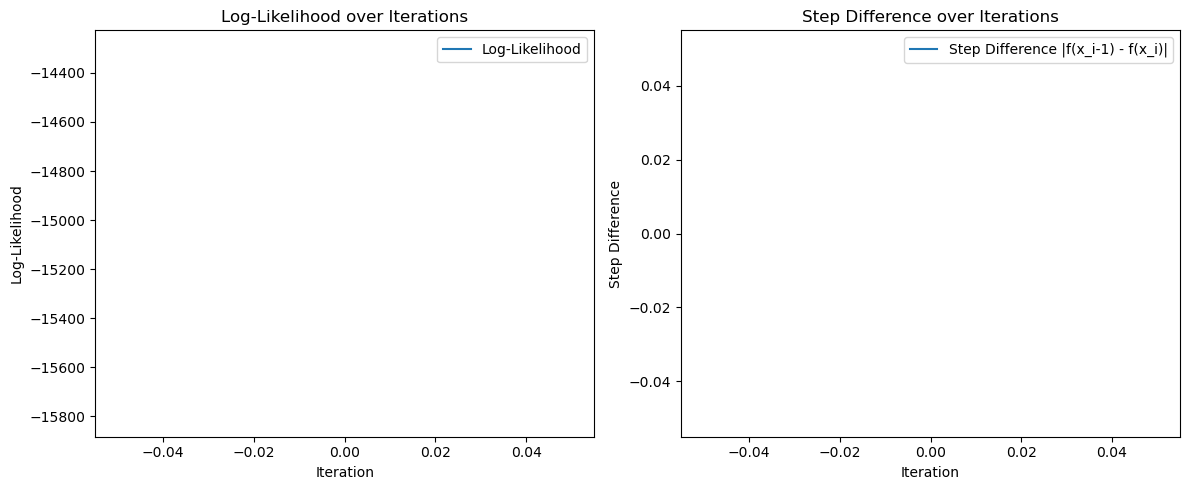

In [21]:
X_train, y_train, X_test, y_test = Xtrain_bank_marketing, Ytrain_bank_marketing, Xtest_bank_marketing, Ytest_bank_marketing
learning_rate = 1e-1
iter_max = 100
tolerance = 1e-3

beta, log_likelihoods, log_likelihoods_test, step_diffs = log_reg_sgd(X_train, y_train,X_test, y_test, learning_rate, iter_max, tolerance)
plot_metrics(log_likelihoods, step_diffs)

<h2>SGD</h2>

In [22]:
def sgd(X, y, learning_rate, iter_max, tolerance, increase_factor, decrease_factor):
    # Ensure X is a numpy array or use .iloc for pandas DataFrame
    if not isinstance(X, np.ndarray):
        X = X.values
    y = np.array(y)

    N, M = X.shape
    theta = np.zeros(M, dtype=np.float64)
    log_likelihoods = []
    step_diffs = []

    for epoch in range(iter_max):
        # Shuffle data
        indices = np.random.permutation(N)
        X_shuffled = X.iloc[indices] if isinstance(X, pd.DataFrame) else X[indices]
        y_shuffled = y.iloc[indices] if isinstance(y, pd.Series) else y[indices]

        prev_log_likelihood = log_likelihood(X_shuffled, y_shuffled, theta)

        for i in range(N):
            x_i, y_i = X_shuffled[i], y_shuffled[i]

            # Predicted value for the current example
            y_hat = sigmoid(np.dot(theta, x_i))

            # Compute the gradient
            gradient = (y_i - y_hat) * x_i

            # Update weights
            theta_new = theta + learning_rate * gradient

            # Adjust learning rate using steplengthbolddriver
            current_log_likelihood = log_likelihood(X_shuffled, y_shuffled, theta_new)
            if current_log_likelihood > prev_log_likelihood:
                learning_rate *= increase_factor
                theta = theta_new
            else:
                learning_rate *= decrease_factor

            prev_log_likelihood = current_log_likelihood

        log_likelihoods.append(prev_log_likelihood)

        # Check convergence
        if np.linalg.norm(gradient) < tolerance:
            print(f"Convergence reached at epoch {epoch}")
            break

    return theta, log_likelihoods, step_diffs

<h3>Bank Marketing Dataset</h3>

In [23]:
learning_rate = 1e-3
iter_max = 1000
tolerance = 1e-5
increase_factor = 1.05
decrease_factor = 0.5

beta, log_likelihoods, step_diffs = sgd(X_train, y_train, learning_rate, iter_max, tolerance, increase_factor, decrease_factor)
plot_metrics(log_likelihoods, step_diffs)

KeyboardInterrupt: 

<h3>Occupancy Detection Dataset</h3>

In [ ]:
# Safe sigmoid function with tighter clipping
def safe_sigmoid(z):
    z = np.clip(z, -10, 10)  # Tighter clipping range for stability
    return 1.0 / (1.0 + np.exp(-z))

# Log-likelihood function with numerical stability
def safe_log_likelihood(X, y, beta):
    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64).squeeze()
    beta = np.asarray(beta, dtype=np.float64)
    
    z = np.dot(X, beta)
    z = np.clip(z, -10, 10)  # Prevent overflow
    
    predictions = safe_sigmoid(z)
    predictions = np.clip(predictions, 1e-7, 1 - 1e-7)  # Prevent log(0)
    
    log_likelihood = np.sum(
        y * np.log(predictions) + 
        (1 - y) * np.log(1 - predictions)
    )
    return log_likelihood

# Stochastic Gradient Descent with enhanced stability and debugging
def log_reg_sgd_stable(X, y, learning_rate=1e-6, iter_max=1000, tolerance=1e-5):
    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64).squeeze()
    
    # Clip features to avoid extreme values
    X = np.clip(X, -5, 5)
    
    N, M = X.shape
    beta = np.random.randn(M) * np.sqrt(1 / M)  # Xavier initialization
    log_likelihoods = []
    step_diffs = []
    lambda_reg = 1e-4  # Regularization parameter
    epsilon = 1e-4  # Small constant to prevent numerical issues
    
    for epoch in range(iter_max):
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        prev_log_likelihood = safe_log_likelihood(X_shuffled, y_shuffled, beta)
        
        for i in range(N):
            x_i, y_i = X_shuffled[i], y_shuffled[i]
            y_hat = safe_sigmoid(np.dot(beta, x_i))

            # Enhanced debugging output
            if i % 1000 == 0:  # Print debug info every 1000 steps
                print("Sample x_i:", x_i[:5])
                print("Sample beta:", beta[:5])
                print("Dot product (beta * x_i):", np.dot(beta, x_i))
                print("Predicted value (y_hat):", y_hat)

            # Check for NaN in y_hat
            if np.isnan(y_hat):
                print("NaN detected in sigmoid output. Exiting.")
                return beta, log_likelihoods, step_diffs

            # Compute the gradient for the single example
            gradient = (y_i - y_hat) * x_i + (-lambda_reg * beta)

            # Add epsilon to the gradient step for stability
            gradient_step = learning_rate * gradient + epsilon
            
            # Check for NaN in gradient step
            if np.isnan(gradient_step).any():
                print("NaN detected in gradient step. Exiting.")
                return beta, log_likelihoods, step_diffs

            beta += gradient_step
        
        current_log_likelihood = safe_log_likelihood(X_shuffled, y_shuffled, beta)
        
        # Check for NaN in log-likelihood
        if np.isnan(current_log_likelihood):
            print("NaN detected in log-likelihood calculation. Exiting.")
            return beta, log_likelihoods, step_diffs

        log_likelihoods.append(current_log_likelihood)
        step_diff = abs(current_log_likelihood - prev_log_likelihood)
        step_diffs.append(step_diff)

        # Print metrics for debugging
        print(f"Epoch {epoch}: Log-Likelihood = {current_log_likelihood}, Step Difference = {step_diff}")

        # Check convergence
        if step_diff < tolerance:
            print(f"Converged at epoch {epoch}")
            break

    return beta, log_likelihoods, step_diffs

def plot_training_metrics(log_likelihoods, step_diffs, title_prefix="SGD Stable"):
    plt.figure(figsize=(12, 5))

    # Plot Log-Likelihood
    plt.subplot(1, 2, 1)
    plt.plot(log_likelihoods, label='Log-Likelihood')
    plt.xlabel('Epoch')
    plt.ylabel('Log-Likelihood')
    plt.title(f'{title_prefix} Log-Likelihood over Epochs')
    plt.legend()

    # Plot Step Difference
    plt.subplot(1, 2, 2)
    plt.plot(step_diffs, label='Step Difference')
    plt.xlabel('Epoch')
    plt.ylabel('Step Difference')
    plt.title(f'{title_prefix} Step Difference over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
learning_rate = 1e-3
iter_max = 1000
tolerance = 1e-6

beta, log_likelihood_history, step_diff_history = log_reg_sgd_stable(Xtrain_occupancy_detection, Ytrain_occupancy_detection, learning_rate, iter_max, tolerance)
plot_training_metrics(log_likelihood_history, step_diff_history, title_prefix="SGD Stable")

<h3> Exercise 2: Implement AdaGrad for Adaptive Step Length</h3>

Implement the AdaGrad algorithm, adjusting the learning rate adaptively:

1. **Calculate Objective Differences**  
   For each iteration, calculate $ |f(x_{i-1}) - f(x_i)| $ and plot it against the iteration number.

2. **Log-Loss on Test Set**  
   Plot the log-loss at each iteration on the test set.

3. **Comparison of Algorithms**  
   Compare the log-loss plots between AdaGrad and the steplengthbolddriver method.

P.S. https://dvl.in.tum.de/slides/i2dl-ss18/5.Optimization.pdf

In [ ]:
# AdaGrad-Algorithmus für logistische Regression
def adagrad(X, y, learning_rate, iter_max, tolerance, epsilon):
    N, M = X.shape
    theta = np.zeros(M, dtype=np.float64)  # Initialisierung der Parameter
    G = np.zeros(M, dtype=np.float64)      # Kumulierte Summe der Gradientenquadrate
    log_likelihoods = []

    for epoch in range(iter_max):
        # Shuffle der Daten
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        prev_log_likelihood = log_likelihood(X_shuffled, y_shuffled, theta)

        # Aktualisiere die Parameter für jedes Trainingsbeispiel
        for i in range(N):
            x_i = X_shuffled[i]
            y_i = y_shuffled[i]

            # Vorhersage und Gradient berechnen
            y_hat = sigmoid(np.dot(theta, x_i))
            gradient = (y_i - y_hat) * x_i

            # Kumulierte Summe der Gradientenquadrate aktualisieren
            G += gradient**2

            # AdaGrad-Update der Parameter
            theta += learning_rate / (np.sqrt(G) + epsilon) * gradient

        # Log-Loss berechnen
        current_log_likelihood = log_likelihood(X_shuffled, y_shuffled, theta)
        log_likelihoods.append(current_log_likelihood)

        # Konvergenzprüfung
        if abs(current_log_likelihood - prev_log_likelihood) < tolerance:
            print(f"Konvergenz erreicht nach {epoch} Epochen.")
            break

    return theta, log_likelihoods

<h3>Bank Marketing Dataset</h3>

In [ ]:
X_train, y_train = Xtrain_bank_marketing, Ytrain_bank_marketing
learning_rate = 1e-3
iter_max = 100
tolerance = 1e-4
epsilon = 1e-7

theta, log_likelihoods, step_diffs = adagrad(X_train, y_train, learning_rate, iter_max, tolerance, epsilon)
plot_metrics(log_likelihoods, step_diffs)

<h3>Occupancy Detection Dataset</h3>

In [ ]:
X_train, y_train = Xtrain_occupancy_detection, Ytrain_occupancy_detection
learning_rate = 1e-3
iter_max = 100
tolerance = 1e-4
epsilon = 1e-7

theta, log_likelihoods, step_diffs = adagrad(X_train, y_train, learning_rate, iter_max, tolerance, epsilon)
plot_metrics(log_likelihoods, step_diffs)

In [ ]:
def plot_comparison(log_loss_sgd, log_loss_adagrad):
    plt.figure(figsize=(10, 5))
    plt.plot(log_loss_sgd, label="Steplength Bold Driver")
    plt.plot(log_loss_adagrad, label="AdaGrad")
    plt.xlabel("Iteration")
    plt.ylabel("Log-Loss")
    plt.title("Comparison of Log-Loss: Steplength Bold Driver vs AdaGrad")
    plt.legend()
    plt.show()